<a href="https://colab.research.google.com/github/shabari0019/PyTorch_YT/blob/main/PT_1_0_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch workflow from end-to-end

1 data (prepare and load)

2 build model

3 fitting the model to data(training)

4 saving and loading

5 saving and loading a model

6 putting it all together

In [20]:

import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.6.0+cu124'

##1 data preparing and loading

In [21]:
weight = 0.7
bias = 0.3


start = 0
end =1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
y


tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [22]:
 #create a train test split

train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

In [23]:
X_train,len(y_train)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 40)

In [24]:
def plot_predictions(prediction=None):
  train_data=X_train,
  train_labels=y_train,
  test_data=X_test,
  test_labels=y_test,

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
  if prediction is not None:
    plt.scatter(test_data,prediction,c='r',s=4,label = "sizePredictions")
  plt.legend();


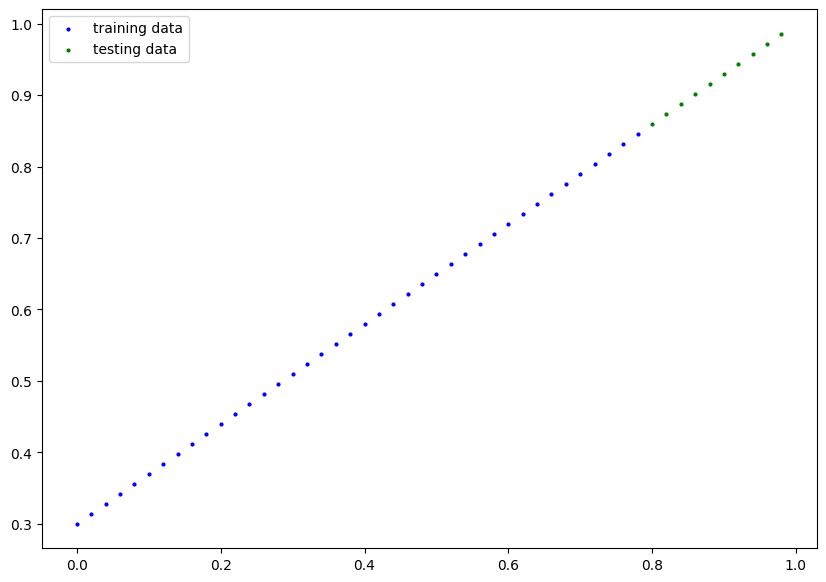

In [25]:
plot_predictions()

2.Building models using pytorch

In [26]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad =True,dtype = torch.float ))
    self.bais = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))

  def forward(self,x: torch.Tensor) -> torch.Tensor: #if indenetation is not proper "forward function is implement error may come"
    return self.weights *x+self.bais


In [27]:
 # torch.nn consists all the building blocks
 # torch.Parameter what parameters should our model try and learn
 # the base class for all neural network modules
 # torch.optim optimizer which helps for gradient descent
 # def forward() method defines what happens in the forward computation


In [28]:
#checking contents of our pytorch

torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [29]:
weight,bias


(0.7, 0.3)

In [30]:
y_preds_no_inference = model_0(X_test)
y_preds_no_inference  # it holds all the values related to gradients of parameters

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [31]:
#makeing prediction using torch.inference_mode()

with torch.inference_mode():#infrence mode doesn't keeps track of gradients
  y_preds = model_0(X_test)
y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

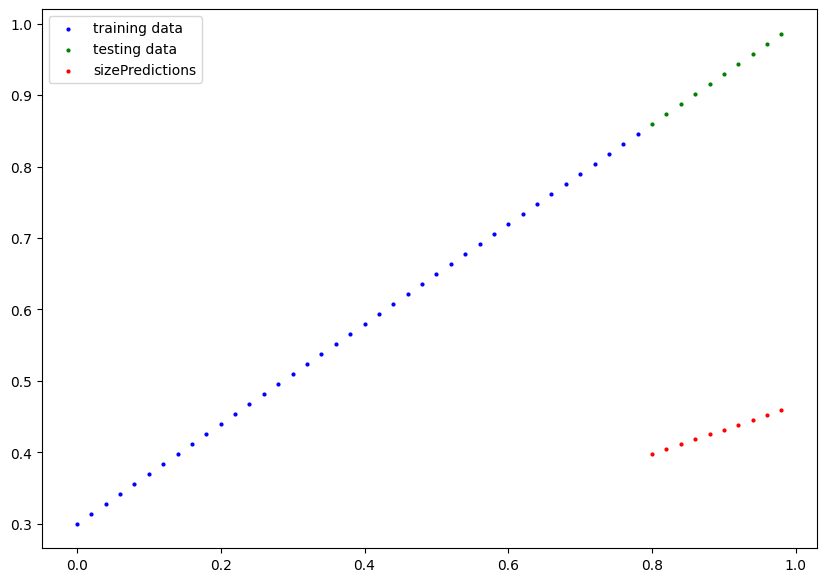

In [32]:
plot_predictions(prediction =y_preds)

In [33]:
#https://youtu.be/V_xro1bcAuA?t=20481

3 Training the model

In [34]:
# to measure how good our model predictions is we need to have loss functions

#optimizers takes into account the loss of the model then updates the parameters

model_0.state_dict()
# we add train loop and test loop to get near actual value of parametes

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [35]:
#setup an loss fuctions and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [36]:
list(model_0.parameters()) # making sure we have requires_grad is True

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
#building the training and testing loop in pytorch
loss = 0
epochs = 500
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_0.train()# setting our model to train mode
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train) #(input,output)

  optimizer.zero_grad() # zero the gradient of the optimizer (as they accumulate by default)
  loss.backward() #backpropogation
  optimizer.step() #perform gradient descent
  model_0.eval()# this turnoff different setting in the model not needed for evaluation

print(loss)

tensor(0.0026, grad_fn=<MeanBackward0>)


In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [46]:
weight,bias

(0.7, 0.3)

In [68]:
with torch.inference_mode():
  ypred_new = model_0(X_test)


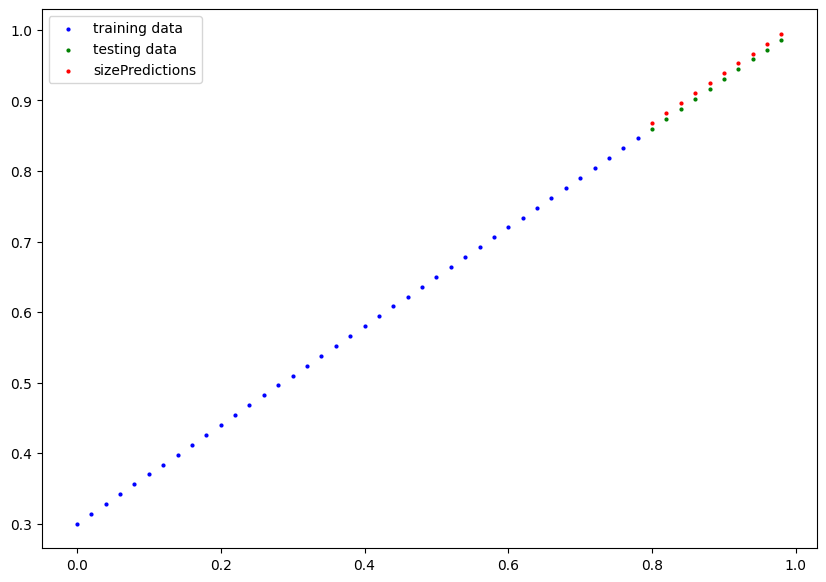

In [69]:
plot_predictions(prediction = ypred_new)

In [72]:
 # save the model as python pickle

 #torch.nn.Module.load_state_dict() this allows to load the model's saved dictionary



 model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [73]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)#exist ok means if dic already there also there won't be any error

MODEL_NAME = "01_pytorch_workflow_model_0.pth" #.pth is pytorch extension to save model
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [74]:
#save and load the model should always with model.state_dict()

torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

In [76]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([-1.1229])), ('bais', tensor([-0.1863]))])

In [78]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])